In [1]:
import numpy as mnp
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

%matplotlib inline

In [2]:
def calibrate_camera(white):
    r_offset = 0.
    g_offset = 0.
    b_offset = 0.

    for row in white:
        for r,g,b in row: 
            r_offset += 255 - r
            g_offset += 255 - g
            b_offset += 255 - b
    
    r_offset /= white.shape[0] * white.shape[1]
    g_offset /= white.shape[0] * white.shape[1]
    b_offset /= white.shape[0] * white.shape[1]
    
    return r_offset, g_offset, b_offset

Red offset:  28.7461
Green offset:  32.3742
Blue offset:  41.5634


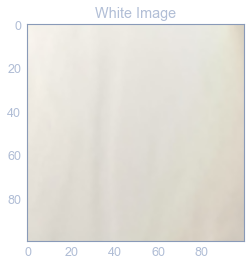

In [3]:
white = np.array(mpimg.imread('pics/w2.jpg'))
white = np.array(Image.fromarray(white).resize((100,100)))
plt.title("White Image")
plt.imshow(white)

r_offset, g_offset, b_offset = calibrate_camera(white)
print('Red offset: ', r_offset)
print('Green offset: ', g_offset)
print('Blue offset: ', b_offset)

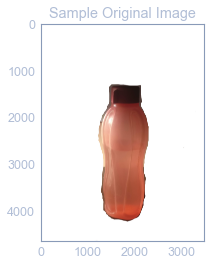

In [4]:
# Read in images
red_paths = glob.glob('pics/r*jpg')
reds_rgb = np.array([mpimg.imread(impath) for impath in red_paths])
yellow_paths = glob.glob('pics/y*jpg')
yellows_rgb = np.array([mpimg.imread(impath) for impath in yellow_paths])
plt.title('Sample Original Image')
plt.imshow(reds_rgb[0])

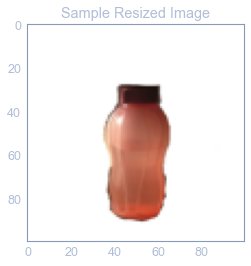

In [5]:
# Reduce Resolution

reds_rgb_x = []
yellows_rgb_x = []

for image in reds_rgb:
    reds_rgb_x.append(np.array(Image.fromarray(image).resize((100,100))))
for image in yellows_rgb:
    yellows_rgb_x.append(np.array(Image.fromarray(image).resize((100,100))))

reds_rgb = np.array(reds_rgb_x)
yellows_rgb = np.array(yellows_rgb_x)

plt.title('Sample Resized Image')
plt.imshow(reds_rgb[0])

In [6]:
def colour_correct(batch, r_offset, g_offset, b_offset):
    images_x = []

    for image in batch:
        image_x = np.zeros_like(image)
        for row in range(image.shape[0]):
            for col in range(image.shape[1]):
                pixel = image[row][col]
                if np.all(pixel == 255):
                    image_x[row][col] = pixel
                else:
                    pixel[0] = max(pixel[0] - r_offset, 0)
                    pixel[1] = max(pixel[1] - g_offset, 0)
                    pixel[2] = max(pixel[2] - b_offset, 0)
                    image_x[row][col] = pixel
        images_x.append(image_x)

    return images_x

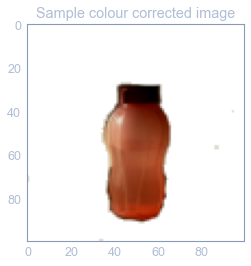

In [7]:
reds_rgb = np.array(colour_correct(reds_rgb, r_offset, g_offset, b_offset))
yellows_rgb = np.array(colour_correct(yellows_rgb, r_offset, g_offset, b_offset))

reds_hsv = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2HSV) for image in reds_rgb])
yellows_hsv = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2HSV) for image in yellows_rgb])

plt.title('Sample colour corrected image')
plt.imshow(reds_rgb[0])

Text(0.5, 1.0, 'Yellow 5')

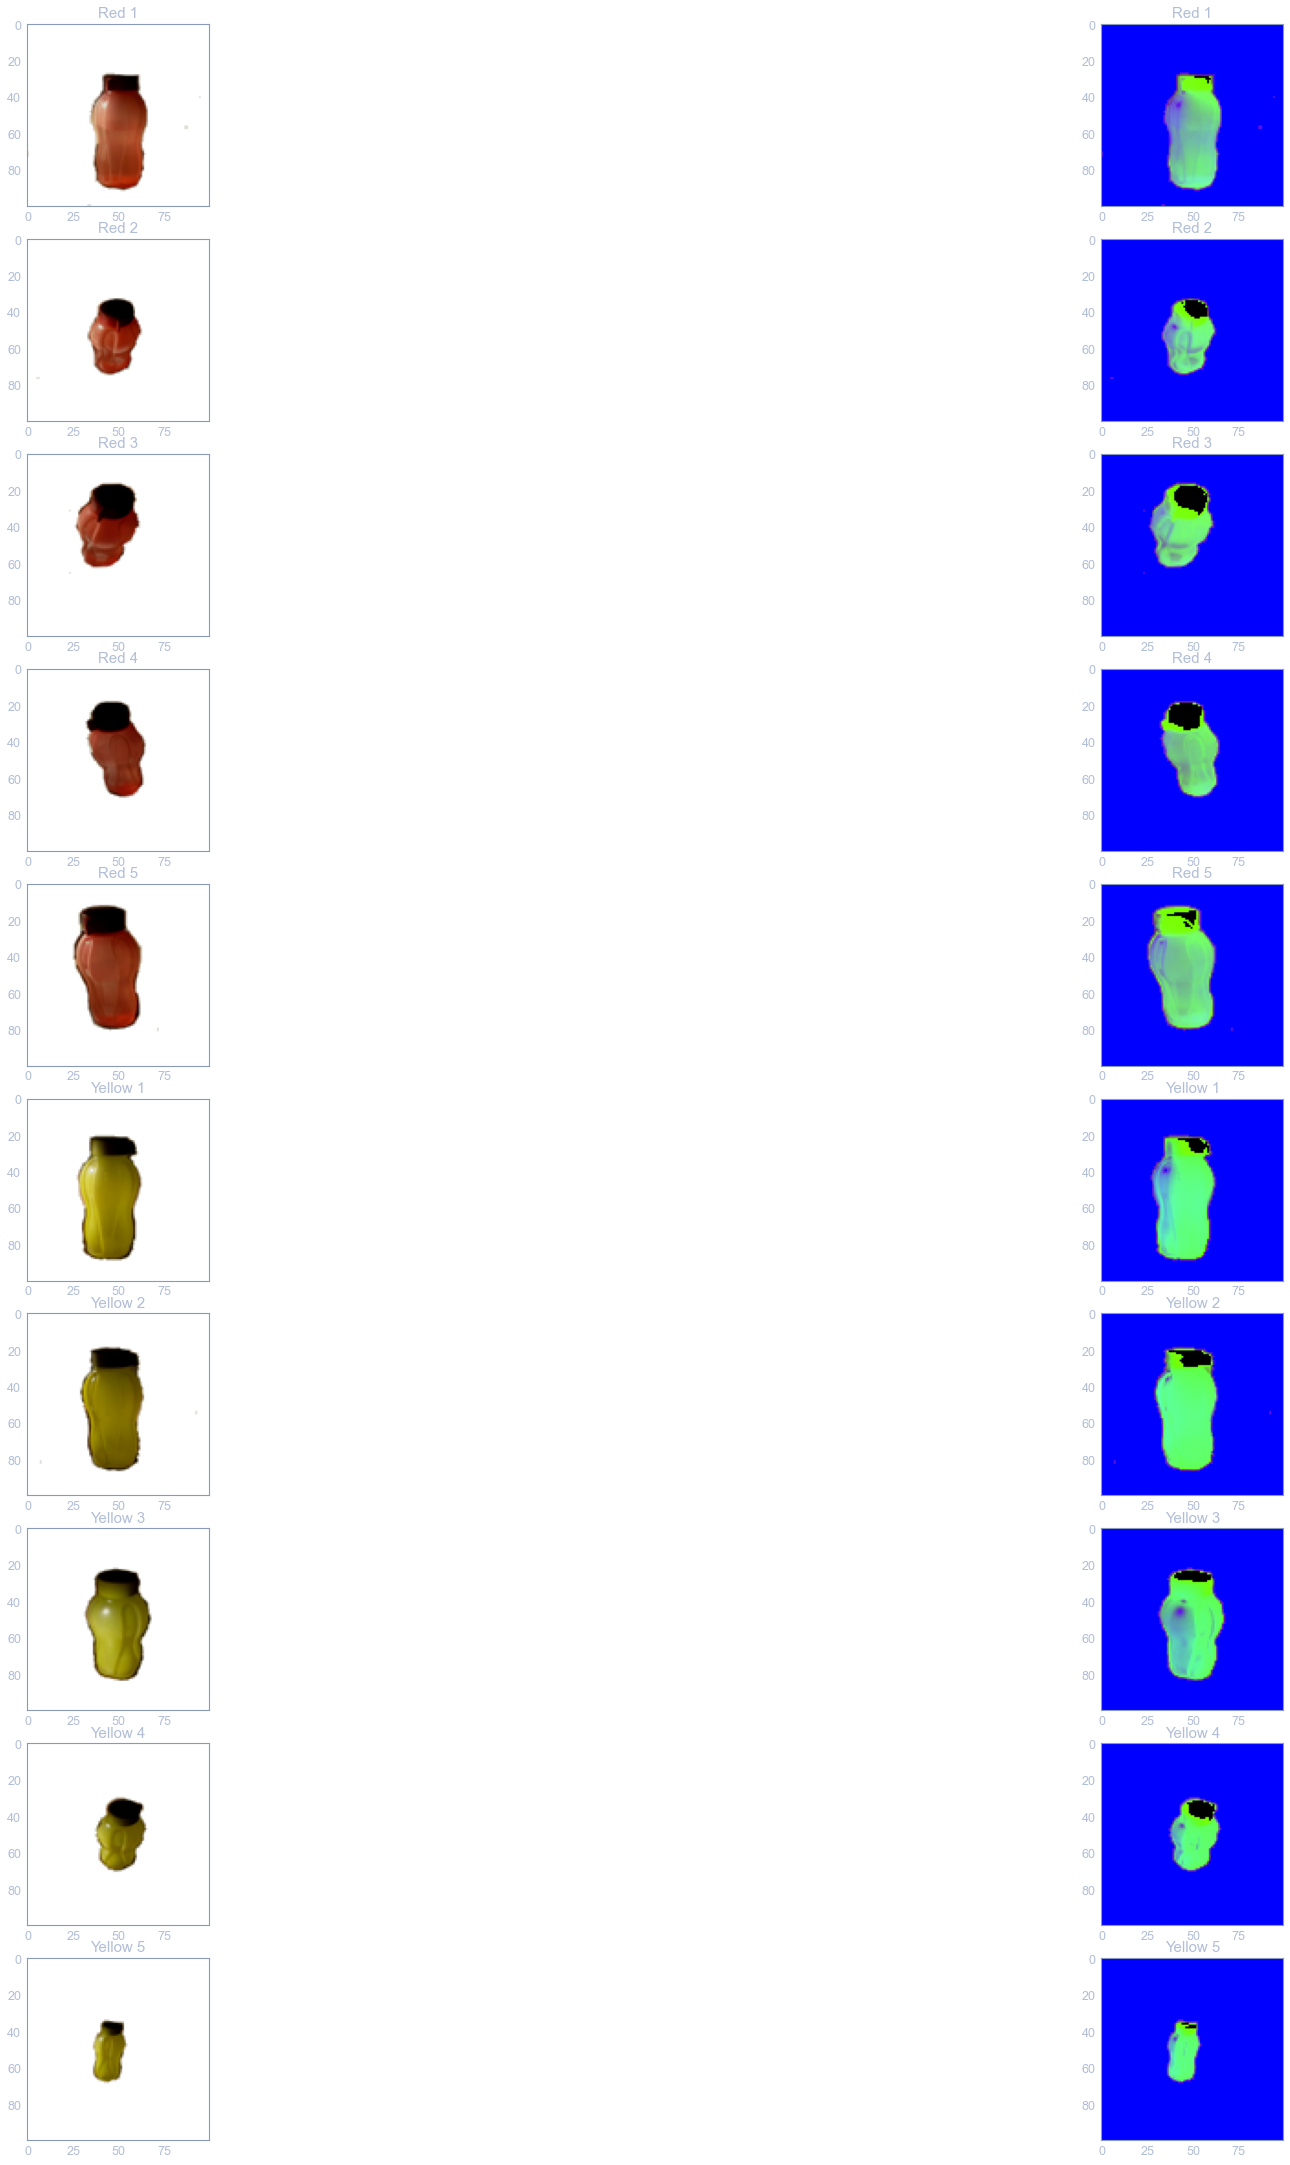

In [8]:
f, ((ax1,ax11),(ax2, ax12),(ax3, ax13),(ax4,ax14),(ax5, ax15),(ax6, ax16), (ax7, ax17), (ax8, ax18),(ax9,ax19),(ax10,ax20)) = plt.subplots(10, 2, figsize=(30, 30))
f.tight_layout()

ax1.imshow(reds_rgb[0])
ax1.set_title('Red 1', fontsize=15)

ax2.imshow(reds_rgb[1])
ax2.set_title('Red 2', fontsize=15)

ax3.imshow(reds_rgb[2])
ax3.set_title('Red 3', fontsize=15)

ax4.imshow(reds_rgb[3])
ax4.set_title('Red 4', fontsize=15)

ax5.imshow(reds_rgb[4])
ax5.set_title('Red 5', fontsize=15)

ax6.imshow(yellows_rgb[0])
ax6.set_title('Yellow 1', fontsize=15)

ax7.imshow(yellows_rgb[1])
ax7.set_title('Yellow 2', fontsize=15)

ax8.imshow(yellows_rgb[2])
ax8.set_title('Yellow 3', fontsize=15)

ax9.imshow(yellows_rgb[3])
ax9.set_title('Yellow 4', fontsize=15)

ax10.imshow(yellows_rgb[4])
ax10.set_title('Yellow 5', fontsize=15)

ax11.imshow(reds_hsv[0])
ax11.set_title('Red 1', fontsize=15)

ax12.imshow(reds_hsv[1])
ax12.set_title('Red 2', fontsize=15)

ax13.imshow(reds_hsv[2])
ax13.set_title('Red 3', fontsize=15)

ax14.imshow(reds_hsv[3])
ax14.set_title('Red 4', fontsize=15)

ax15.imshow(reds_hsv[4])
ax15.set_title('Red 5', fontsize=15)

ax16.imshow(yellows_hsv[0])
ax16.set_title('Yellow 1', fontsize=15)

ax17.imshow(yellows_hsv[1])
ax17.set_title('Yellow 2', fontsize=15)

ax18.imshow(yellows_hsv[2])
ax18.set_title('Yellow 3', fontsize=15)

ax19.imshow(yellows_hsv[3])
ax19.set_title('Yellow 4', fontsize=15)

ax20.imshow(yellows_hsv[4])
ax20.set_title('Yellow 5', fontsize=15)

In [9]:
def is_white(pixel, cspace='rgb'):
    
    if cspace == 'rgb':
        return np.all(pixel == 255)
    elif cspace == 'hsv':
        return np.array_equal(pixel, [0,0,255])

In [10]:
# Color Exploration

rgb = []
hsv = []

for image in np.concatenate((reds_rgb,yellows_rgb)):
    r = 0.
    g = 0.
    b = 0.
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel = image[row][col]
            if not is_white(pixel,'rgb'):
                r += pixel[0]
                g += pixel[1]
                b += pixel[2]
    
    # Normalize
    total = r + g + b
    r = r / total
    g = g / total
    b = b / total
    
    rgb.append(np.array([r,g,b]))
    
for image in np.concatenate((reds_hsv,yellows_hsv)):
    h = 0.
    s = 0.
    v = 0.
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel = image[row][col]
            if not is_white(pixel,'hsv'):
                h += pixel[0]
                s += pixel[1]
                v += pixel[2]
    
    # Calculate Means
    total_pixels = image.shape[0] * image.shape[1]
    h = h / total_pixels
    s = s / total_pixels
    v = v / total_pixels
    
    hsv.append(np.array([h,s,v]))

for item in np.concatenate((rgb,hsv), axis=1):
    print('R: {:.2f} G: {:.2f} B: {:.2f} H: {:.2f} S: {:.2f} V: {:.2f}'.format(item[0], item[1], item[2], item[3], item[4], item[5]))

R: 0.54 G: 0.28 B: 0.18 H: 18.59 S: 30.15 V: 24.75
R: 0.56 G: 0.26 B: 0.18 H: 9.44 S: 15.86 V: 11.68
R: 0.58 G: 0.25 B: 0.17 H: 11.76 S: 20.43 V: 12.94
R: 0.56 G: 0.26 B: 0.18 H: 11.96 S: 20.15 V: 13.18
R: 0.58 G: 0.26 B: 0.16 H: 22.14 S: 38.97 V: 24.52
R: 0.48 G: 0.43 B: 0.09 H: 18.33 S: 41.56 V: 26.65
R: 0.50 G: 0.43 B: 0.07 H: 17.38 S: 41.37 V: 21.52
R: 0.46 G: 0.43 B: 0.11 H: 15.28 S: 33.80 V: 21.35
R: 0.47 G: 0.42 B: 0.12 H: 7.18 S: 15.75 V: 9.00
R: 0.47 G: 0.42 B: 0.11 H: 4.79 S: 10.48 V: 6.61


In [11]:
# Thresholding and Detection